In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

## I. Explore and clean the data

In [29]:
wvs = pd.read_csv("wvs.csv", sep="\t")

In [30]:
wvs.sample(6)

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,MN_228S8,MN_229A,MN_230A,MN_233A,MN_237B1,MN_249A1,MN_249A3,I_RELIGBEL,I_NORM1,I_VOICE1
87027,860,1,2,3,2,1,3,3,2,2,...,-4,-4,-4,-4,-4,-4,-4,0.0,1.0,0.00
18763,233,1,3,1,2,4,1,3,3,1,...,-4,-4,-4,-4,-4,-4,-4,0.0,0.0,0.33
8038,112,1,2,1,3,1,3,2,2,1,...,-4,-4,-4,-4,-4,-4,-4,1.0,1.0,0.00
62213,643,1,3,2,4,4,4,2,3,2,...,-4,-4,-4,-4,-4,-4,-4,0.0,0.0,0.33
6054,48,1,3,4,1,2,2,1,1,1,...,1,2,1,2,-3,1,1,1.0,1.0,1.00
54816,275,1,3,4,2,3,1,2,3,1,...,-4,-4,-4,-4,-4,-4,-4,0.0,1.0,0.00


In [31]:
wvs.shape

(90350, 328)

### Clean V23 

In [32]:
wvs_clean = wvs[wvs.V23 > 0]

In [33]:
wvs_clean.shape

(89771, 328)

In [34]:
wvs_clean = wvs_clean[~wvs_clean.V23.isna()]

In [35]:
wvs_clean.shape

(89771, 328)

### Make a plot of different answers

In [36]:
wvs_clean.V23.value_counts()

8     18213
7     15493
10    11928
5     11331
6     10666
9      9264
4      4600
3      3463
1      2828
2      1985
Name: V23, dtype: int64

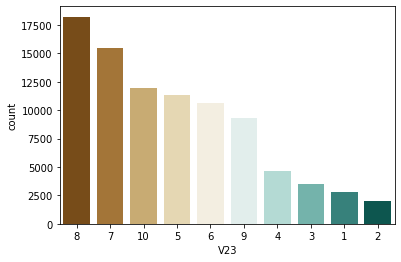

In [37]:
sns.countplot(x="V23",data=wvs_clean,palette="BrBG",order = wvs_clean['V23'].value_counts().index)

In [38]:
wvs_clean['satisfied'] = wvs_clean.V23.apply(lambda x: 1 if x>5 else 0)

In [41]:
wvs_clean.satisfied.value_counts(normalize=True) * 100

1    73.034722
0    26.965278
Name: satisfied, dtype: float64

Based on the above response 73% of the respondents are at a satisfaction level greater than 6.

## II. Create the design matrix

### Select more than 100 variables and create outcome variable

In [233]:
wvs_100 = wvs_clean[['V2', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V49', 'V55', 'V57', 'V58', 'V59', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V126', 'V145', 'V146', 'V147', 'V148', 'V149', 'V152', 'V170', 'V171', 'V172', 'V173' , 'V174', 'V175', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V188', 'V189', 'V190', 'V191', 'V211', 'V212', 'V213', 'V214', 'V216', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V243', 'V245', 'V246', 'V248', 'V253', 'V255']]

In [234]:
wvs_100.shape

(89771, 108)

In [235]:
wvs_100.dropna(inplace=True)

/Users/hshetty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [236]:
wvs_100.head()

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V23,...,V237,V238,V239,V240,V243,V245,V246,V248,V253,V255
0,12,1,1,1,-2,1,1,2,1,8,...,1,4,5,1,2,1,1,7.0,1,1
1,12,1,2,3,4,2,2,2,2,5,...,2,3,6,2,2,1,1,7.0,1,1
2,12,1,3,2,4,2,1,2,2,4,...,1,4,6,2,2,1,1,5.0,1,1
3,12,1,1,3,4,3,1,2,1,8,...,4,4,5,2,2,1,1,6.0,1,1
4,12,1,1,1,2,1,1,1,3,8,...,2,3,7,2,2,1,1,3.0,1,1


In [237]:
wvs_100.shape

(89770, 108)

In [238]:
#for column in wvs_100.columns:
#    print(column)
#    print(wvs_100[wvs_100[column]<0].shape)

for column in wvs_100.columns:
    wvs_100.drop(wvs_100[wvs_100[column] < 0].index, inplace = True)

/Users/hshetty/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [239]:
Y = wvs_100.V23

In [240]:
wvs_100.head()

,V2,V4,V5,V6,V7,V8,V9,V10,V11,V23,...,V237,V238,V239,V240,V243,V245,V246,V248,V253,V255
4,12,1,1,1,2,1,1,1,3,8,...,2,3,7,2,2,1,1,3.0,1,1
14,12,1,2,3,4,4,1,2,3,4,...,4,5,4,1,2,1,1,3.0,1,1
31,12,1,4,1,4,1,1,2,2,10,...,1,3,4,2,2,1,1,3.0,1,1
55,12,1,1,2,4,2,1,3,2,5,...,4,4,4,1,2,1,1,5.0,1,1
57,12,1,1,1,2,1,1,3,3,1,...,2,4,5,1,2,1,1,9.0,1,1


In [242]:
Y.shape

(13481,)

### Convert categorical variables into dummy variables

The variables that are categorical are - V2, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V57, V147, V148, V149, V179, V180, V230, V234, V235, V236, V237, V240, V243, V245, V246 AND V255

In [243]:
cat_cols = ['V2', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V57', 'V147', 'V148', 'V149', 'V179', 'V180', 'V230', 'V234', 'V235', 'V236', 'V237', 'V240', 'V243', 'V245', 'V246' , 'V255']

wvs_100 = pd.get_dummies(data=wvs_100, columns=cat_cols, drop_first=True)

## III. Condition Numbers

In [244]:
wvs_100_mod = pd.DataFrame()
ctr = 0
print('Condition numbers')

for column in wvs_100.columns:
    wvs_100_mod[column] = wvs_100[column]
    ctr += 1
    print(column,',' ,ctr, 'columns, k=',np.linalg.cond(wvs_100_mod))

Condition numbers
V4 , 1 columns, k= 1.0
V5 , 2 columns, k= 4.817556146145612
V6 , 3 columns, k= 6.83268891471901
V7 , 4 columns, k= 9.653095272764018
V8 , 5 columns, k= 11.074676190580623
V9 , 6 columns, k= 12.0670254781654
V10 , 7 columns, k= 13.409629892752902
V11 , 8 columns, k= 14.606965351142664
V23 , 9 columns, k= 25.747766739215397
V49 , 10 columns, k= 26.3604367037649
V55 , 11 columns, k= 34.58902431845327
V58 , 12 columns, k= 35.04952350813847
V59 , 13 columns, k= 39.6059568541214
V70 , 14 columns, k= 40.335625081605166
V71 , 15 columns, k= 41.81030621839575
V72 , 16 columns, k= 42.547009637399164
V73 , 17 columns, k= 43.57424836488091
V74 , 18 columns, k= 44.12376785198366
V75 , 19 columns, k= 44.870241205173684
V76 , 20 columns, k= 46.06763641761684
V77 , 21 columns, k= 46.679824316824444
V78 , 22 columns, k= 47.301415883607504
V79 , 23 columns, k= 47.91650871050504
V102 , 24 columns, k= 49.908537251919874
V103 , 25 columns, k= 50.472447682625365
V104 , 26 columns, k= 50.96

## IV. Do some social science

### Perform OLS 

In [250]:
import statsmodels.formula.api as smf

model = smf.ols(formula='V23 ~ V11 + V59 + V55', data=wvs_100_mod).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    V23   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     1911.
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:23:53   Log-Likelihood:                -28269.
No. Observations:               13481   AIC:                         5.655e+04
Df Residuals:                   13477   BIC:                         5.658e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4447      0.082     42.139      0.0

### Compute RMSE

In [251]:
predictions = model.predict()

In [256]:
from statsmodels.tools.eval_measures import rmse

model_rmse = rmse(Y,predictions)
print(model_rmse)

1.9699084109736726


In [ ]:
wvs_100.drop('V23', axis=1, inplace=True)